In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read CSV File

In [4]:
df = pd.read_csv('Covid19India.csv')
df

C:\Users\ANISHA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected District,Detected State,Current Status,Day,Month,Year
0,0,1.0,30/01/2020,20,F,Thrissur,Kerala,Recovered,30.0,1.0,2020.0
1,1,1.0,02/02/2020,NaN,NaN,Alappuzha,Kerala,Recovered,2.0,2.0,2020.0
2,2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kerala,Recovered,3.0,2.0,2020.0
3,3,1.0,02/03/2020,45,M,East Delhi,Delhi,Recovered,2.0,3.0,2020.0
4,4,1.0,02/03/2020,24,M,Hyderabad,Telangana,Recovered,2.0,3.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...
822051,16224,NaN,29/09/2021,NaN,NaN,NaN,NaN,NaN,29.0,9.0,2021.0
822052,16225,NaN,29/09/2021,NaN,NaN,NaN,NaN,NaN,29.0,9.0,2021.0
822053,16226,NaN,29/09/2021,NaN,NaN,NaN,NaN,NaN,29.0,9.0,2021.0
822054,16227,NaN,29/09/2021,NaN,NaN,NaN,NaN,NaN,29.0,9.0,2021.0


In [5]:
data = df.iloc[:,1:]
data

,Num Cases,Date Announced,Age Bracket,Gender,Detected District,Detected State,Current Status,Day,Month,Year
0,1.0,30/01/2020,20,F,Thrissur,Kerala,Recovered,30.0,1.0,2020.0
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Kerala,Recovered,2.0,2.0,2020.0
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kerala,Recovered,3.0,2.0,2020.0
3,1.0,02/03/2020,45,M,East Delhi,Delhi,Recovered,2.0,3.0,2020.0
4,1.0,02/03/2020,24,M,Hyderabad,Telangana,Recovered,2.0,3.0,2020.0
...,...,...,...,...,...,...,...,...,...,...
822051,NaN,29/09/2021,NaN,NaN,NaN,NaN,NaN,29.0,9.0,2021.0
822052,NaN,29/09/2021,NaN,NaN,NaN,NaN,NaN,29.0,9.0,2021.0
822053,NaN,29/09/2021,NaN,NaN,NaN,NaN,NaN,29.0,9.0,2021.0
822054,NaN,29/09/2021,NaN,NaN,NaN,NaN,NaN,29.0,9.0,2021.0


### Inspect the Data Frame

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822056 entries, 0 to 822055
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Num Cases          821587 non-null  float64
 1   Date Announced     822049 non-null  object 
 2   Age Bracket        139184 non-null  object 
 3   Gender             141450 non-null  object 
 4   Detected District  805187 non-null  object 
 5   Detected State     821589 non-null  object 
 6   Current Status     821598 non-null  object 
 7   Day                822049 non-null  float64
 8   Month              822049 non-null  float64
 9   Year               822049 non-null  float64
dtypes: float64(4), object(6)
memory usage: 62.7+ MB


### Inspect Null Values in each Column

In [8]:
round(data.isnull().sum(axis=0).sort_values(ascending = False)/len(data)*100,2)

Age Bracket          83.07
Gender               82.79
Detected District     2.05
Num Cases             0.06
Detected State        0.06
Current Status        0.06
Date Announced        0.00
Day                   0.00
Month                 0.00
Year                  0.00
dtype: float64

### Inspect Null Values in each Row

In [16]:
data.isnull().sum(axis=1).sort_values(ascending=False)

224898    10
404952    10
404953    10
404954    10
271479    10
          ..
144575     0
144574     0
144573     0
144572     0
0          0
Length: 822056, dtype: int64

### Total Covid19 Cases Month wise

In [17]:
M=(data[data['Current Status']=='Hospitalized'].groupby('Month')['Num Cases'].sum())
M

Month
1.0      472317.0
2.0      353426.0
3.0     1110091.0
4.0     6969688.0
5.0     9172468.0
6.0     2632028.0
7.0     2355236.0
8.0     3146893.0
9.0     3548972.0
10.0    1873130.0
11.0    1279860.0
12.0     823056.0
Name: Num Cases, dtype: float64

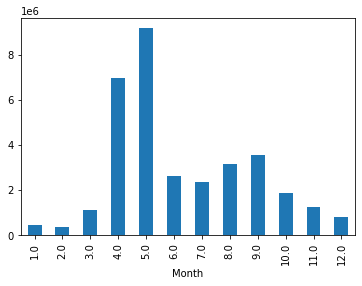

In [18]:
M.plot.bar()
plt.show()

### Total Male/Female Infected with Covid

In [19]:
data.groupby('Gender')['Num Cases'].sum()

Gender
 M                1.0
-                 1.0
F             51486.0
F                 6.0
Fal               1.0
Femal e           1.0
M             93235.0
M                 7.0
M,                1.0
Non-Binary       19.0
gf                1.0
Name: Num Cases, dtype: float64

### Age Group thta was affected the most

In [20]:
M = data.groupby('Age Bracket')['Num Cases'].sum().sort_values(ascending=False).head(10)
M

Age Bracket
30.0    1925.0
58.0    1861.0
30      1789.0
40.0    1723.0
35      1675.0
35.0    1641.0
40      1623.0
45.0    1599.0
32.0    1551.0
45      1546.0
Name: Num Cases, dtype: float64

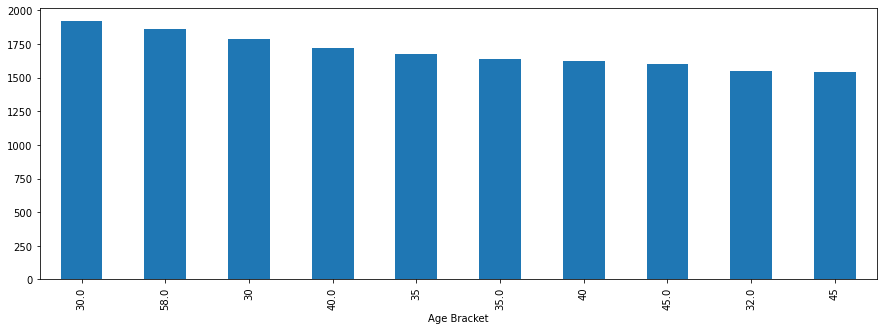

In [21]:
M.plot.bar(figsize=(15,5))
plt.show()

### Check State wise Total Cases in India

In [22]:
M=data[data['Current Status']== 'Hospitalized'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False)
M

Detected State
Maharashtra                                 6547779.0
Kerala                                      4664883.0
Karnataka                                   2974995.0
Tamil Nadu                                  2662170.0
Andhra Pradesh                              2049312.0
Uttar Pradesh                               1709785.0
West Bengal                                 1567567.0
Delhi                                       1438817.0
Odisha                                      1025873.0
Chhattisgarh                                1005287.0
Rajasthan                                    954318.0
Gujarat                                      825911.0
Madhya Pradesh                               792515.0
Haryana                                      770851.0
Bihar                                        725947.0
Telangana                                    665747.0
Assam                                        601787.0
Punjab                                       601576.0
Jharkhand    

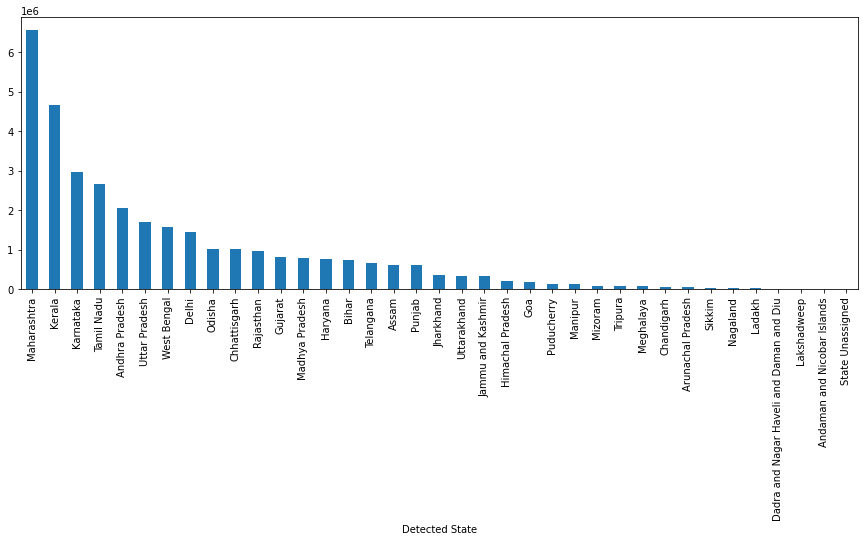

In [23]:
M.plot.bar(figsize=(15,5))
plt.show()

### Number of Cases each day

In [27]:
Day = data[data['Current Status']=='Hospitalized'].groupby(['Month', 'Day'])[['Num Cases']].sum()
Day

Num Cases
Month Day            
1.0   1.0     20159.0
      2.0     18144.0
      3.0     16678.0
      4.0     16278.0
      5.0     17909.0
...               ...
12.0  27.0    20333.0
      28.0    16072.0
      29.0    20542.0
      30.0    21945.0
      31.0    19026.0

[365 rows x 1 columns]

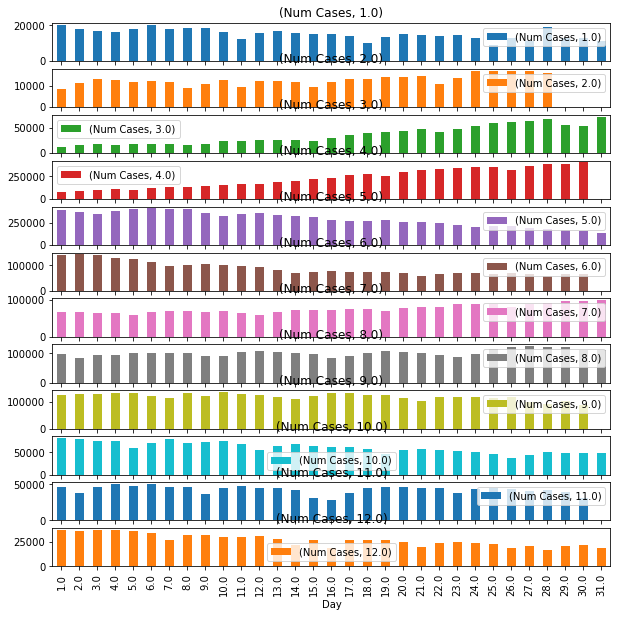

In [28]:
Day.unstack(level=0).plot(kind='bar', subplots=True, figsize=(10,10))
plt.show()

In [29]:
data['Current Status'].unique()

array(['Recovered', 'Hospitalized', 'Deceased', 'Migrated',
       'Migrated_Other', nan, 'Migrated_other', 'hospitalized'],
      dtype=object)

In [30]:
data[data['Current Status']=='Deceased']['Num Cases'].sum()

447238.0

In [31]:
data[data['Current Status']=='Deceased'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False)

Detected State
Maharashtra                                 138680.0
Karnataka                                    37772.0
Tamil Nadu                                   35527.0
Delhi                                        25034.0
Kerala                                       24964.0
Uttar Pradesh                                22862.0
West Bengal                                  18747.0
Punjab                                       16493.0
Andhra Pradesh                               14132.0
Chhattisgarh                                 13564.0
Madhya Pradesh                               10421.0
Gujarat                                       9935.0
Haryana                                       9871.0
Bihar                                         9659.0
Rajasthan                                     8914.0
Odisha                                        8245.0
Uttarakhand                                   7394.0
Assam                                         5867.0
Jharkhand                      